# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn's random forest.

First, we will fit the penguins regression dataset.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and check the
generalization performance on the testing set in terms of mean absolute error.

In [7]:
# Write your code here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

baseline_tree = RandomForestRegressor(n_estimators=3)

baseline_tree.fit(data_train, target_train)

print("The MAE of the baseline random forest classifier is: "
      f"{mae(baseline_tree.predict(data_test), target_test):.2f} g")

The MAE of the baseline random forest classifier is: 361.83 g


We now aim to plot the predictions from the individual trees in the forest.
For that purpose you have to create first a new dataset containing evenly
spaced values for the flipper length over the interval between 170 mm and 230
mm.

In [83]:
# Write your code here.
import numpy as np

dummy_dataset = np.linspace(data_train.values.min(), data_train.values.max(), 75)
dummy_dataset = pd.DataFrame(dummy_dataset, columns=[feature_name])
dummy_dataset.head()

,Flipper Length (mm)
0,172.000000
1,172.797297
2,173.594595
3,174.391892
4,175.189189


The trees contained in the forest that you created can be accessed with the
attribute `estimators_`. Use them to predict the body mass corresponding to
the values in this newly created dataset. Similarly find the predictions of
the random forest in this dataset.

In [85]:
# Write your code here.
predictions = pd.DataFrame()

for i, estimator in enumerate(baseline_tree.estimators_):
    predictions[f"estimator_{i}"] = estimator.predict(dummy_dataset.to_numpy())

predictions["estimators_mean"] = predictions.aggregate('mean', axis=1)
predictions["Random_Forest"] = baseline_tree.predict(dummy_dataset)

In [93]:
concat_df = pd.concat([dummy_dataset, predictions], axis=1)
concat_df

,Flipper Length (mm),estimator_0,estimator_1,estimator_2,estimators_mean,Random_Forest
0,172.000000,3150.000000,3150.000000,3450.000000,3250.000000,3250.000000
1,172.797297,3150.000000,3150.000000,3450.000000,3250.000000,3250.000000
2,173.594595,3400.000000,3400.000000,3450.000000,3416.666667,3416.666667
3,174.391892,3400.000000,3400.000000,3450.000000,3416.666667,3416.666667
4,175.189189,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000
...,...,...,...,...,...,...
70,227.810811,5485.714286,5566.666667,5566.666667,5539.682540,5539.682540
71,228.608108,5485.714286,5950.000000,5950.000000,5795.238095,5795.238095
72,229.405405,5800.000000,5950.000000,5950.000000,5900.000000,5900.000000
73,230.202703,5800.000000,5675.000000,5750.000000,5741.666667,5741.666667


Now make a plot that displays:
- the whole `data` using a scatter plot;
- the decision of each individual tree;
- the decision of the random forest.

<Axes: xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

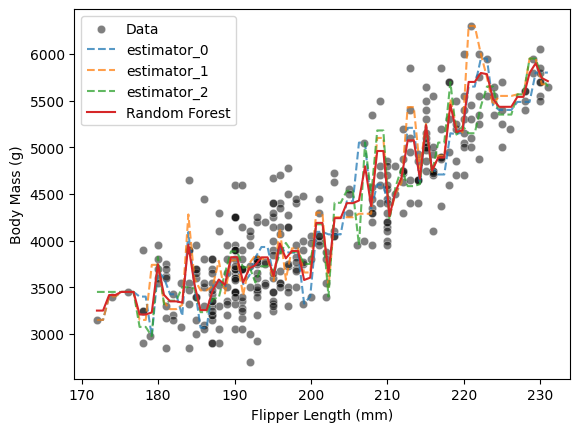

In [98]:
# Write your code here.
import seaborn as sns
sns.scatterplot(data=penguins, x=feature_name, y=target_name, color="black", alpha=.5, label="Data")
for i in range(len(baseline_tree.estimators_)):
    sns.lineplot(data=concat_df, x=feature_name, y=f"estimator_{i}", linestyle="--", alpha=.75, label=f"estimator_{i}")
sns.lineplot(data=concat_df, x=feature_name, y="Random_Forest", label=f"Random Forest")
